In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv(r"F:\0_个人学习\3_数据分析与挖掘\4_机器学习\2_线性回归\线性回归以及非线性回归\data.csv",header=None,names=['x1','x2'])
data.head()

,x1,x2
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [15]:
x = data[:]['x1']
y = data[:]['x2']

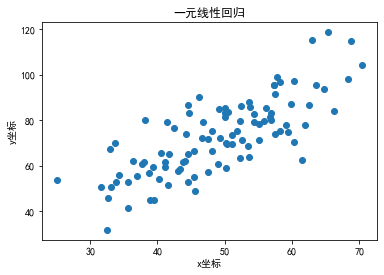

In [24]:
# 绘制作散点图
plt.rcParams['font.sans-serif']=['SimHei']  # 坐标轴标签和标题显示中文
plt.scatter(x,y)
plt.xlabel('x坐标')
plt.ylabel('y坐标')
plt.title('一元线性回归')
plt.show()

In [29]:
# 学习率learning rate
lr = 0.0001
# 截距
b = 0 
# 斜率
k = 0 
# 最大迭代次数
epochs = 50
# 代价函数计算
def compute_error(b,k,x_data,y_data):
    m = len(x_data)
    totalError = 0
    for i in range(m):
        totalError += ((k*x_data[i]+b)-y_data[i])**2
    j_theta = totalError/(2*float(m))
    return j_theta
# 梯度下降算法
def gradient_descent_runner(x_data, y_data, b, k, lr, epochs):
    # 计算总数据量
    m = float(len(x_data))
    for i in range(epochs):
        b_grad = 0
        k_grad = 0
        # 计算梯度的总和再求平均
        for j in range(len(x_data)):
            b_grad += ((k*x_data[j]+b)-y_data[j])/m
            k_grad += x_data[j] * ((k*x_data[j]+b)-y_data[j])/m
        # 更新b和k
        b = b - (lr * b_grad)
        k = k - (lr * k_grad)
        # 每迭代5次，输出一次图像
        if i % 5 == 0:
            print("epochs:",i)
            plt.plot(x_data, y_data, 'b.')
            plt.plot(x_data, k*x_data + b, 'r')
            plt.show()
    return b,k

Starting b = 0, k = 0, error = 2782.553917241605
Running...
epochs: 0


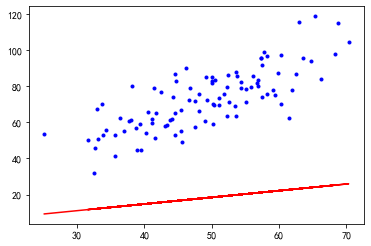

epochs: 5


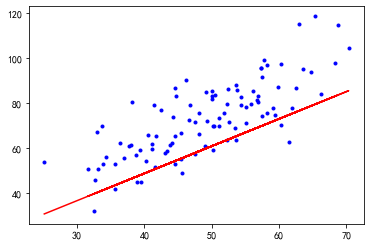

epochs: 10


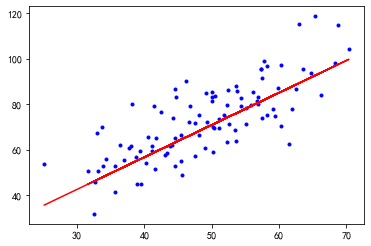

epochs: 15


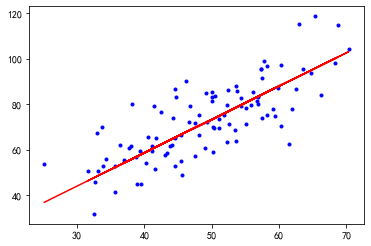

epochs: 20


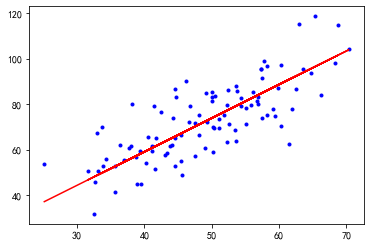

epochs: 25


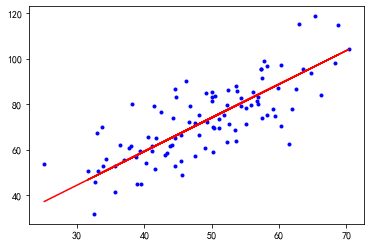

epochs: 30


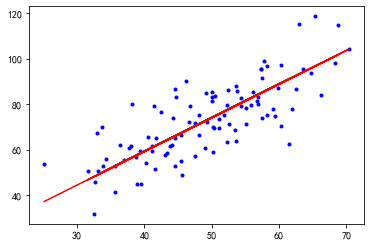

epochs: 35


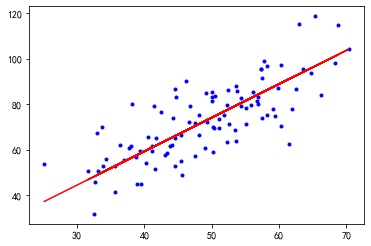

epochs: 40


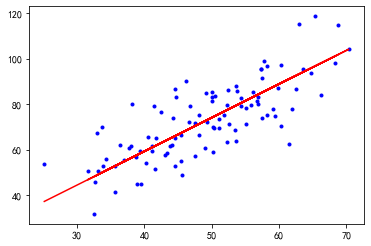

epochs: 45


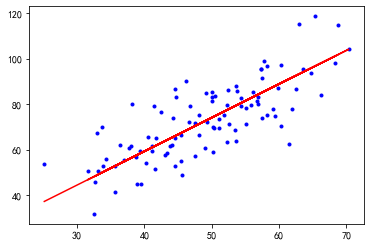

After 50 iterations b = 0.030569950649287983, k = 1.4788903781318357, error = 56.32488184238027


In [30]:
print("Starting b = {0}, k = {1}, error = {2}".format(b, k, compute_error(b, k, x, y)))
print("Running...")
b, k = gradient_descent_runner(x, y, b, k, lr, epochs)
print("After {0} iterations b = {1}, k = {2}, error = {3}".format(epochs, b, k, compute_error(b, k, x, y)))

In [47]:
# sklearn库实现一元线性回归
from sklearn.linear_model import LinearRegression
x_data = np.array(x).reshape(-1,1)
y_data = np.array(y)
lr_gr = LinearRegression()
lr_gr.fit(x_data,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

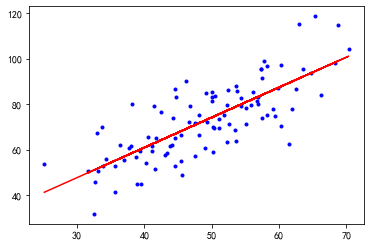

In [49]:
# 画图
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, lr_gr.predict(x_data), 'r')
plt.show()